In [1]:
import networkx as nx
import pandas as pd
import powerlaw
import matplotlib.pyplot as plt
import time
import seaborn as sns
import itertools

In [2]:
def top(d: dict) -> list:
    for key, value in sorted(d.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f'{key}: {value}')

In [3]:
# Load the graph using NetworkX
dataset_name = 'Public Figures'
df = pd.read_csv('data/public_figure_edges.csv')
edges = [tuple(x) for x in df.to_numpy()]

# Creating the graph
G_nx = nx.Graph()
G_nx.add_edges_from(edges)

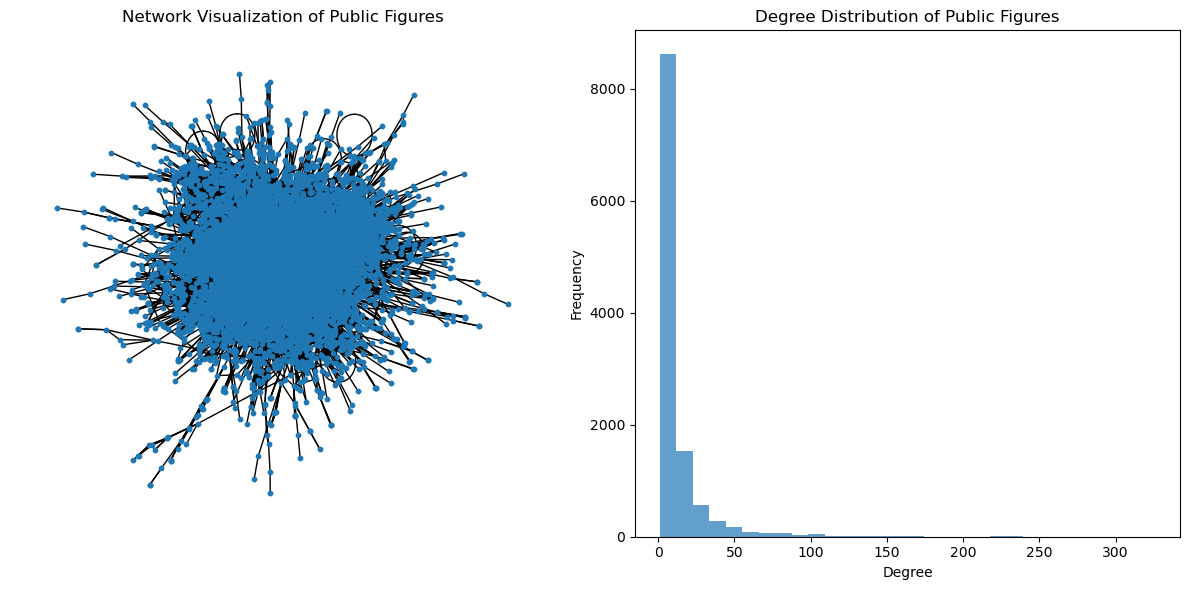

In [4]:
plt.figure(figsize=(12, 6))

# Subplot 1: Network Visualization
plt.subplot(121)
pos = nx.spring_layout(G_nx)
nx.draw(G_nx, node_size=10, pos=pos)
plt.title('Network Visualization of ' + dataset_name)

# Subplot 2: Degree Distribution
plt.subplot(122)
degrees = [d for n, d in G_nx.degree()]
plt.hist(degrees, bins=30, alpha=0.7)
plt.title('Degree Distribution of ' + dataset_name)
plt.xlabel('Degree')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()

In [5]:
# Calculate network properties
degree_distr = sorted(dict(G_nx.degree()).values(), reverse=True)
fit = powerlaw.Fit(degree_distr)

print('Number of nodes:', len(G_nx.nodes()))
print('Number of edges:', len(G_nx.edges()))
print('Min degree:', min(degrees))
print('Max degree:', max(degrees))
print('Average degree:', sum(degrees) / len(degrees))
print('Estimated gamma:', fit.alpha)

Calculating best minimal value for power law fit
Number of nodes: 11565
Number of edges: 67114
Min degree: 1
Max degree: 326
Average degree: 11.606398616515348
Estimated gamma: 2.4085713274236022


## Centrality

In [6]:
betweenness_centrality = nx.betweenness_centrality(G_nx)
print('Betweenness Centrality:')
top(betweenness_centrality)

Betweenness Centrality:
3120: 0.06869182419068683
6978: 0.06596901731685872
1011: 0.06296428814086515
9429: 0.058108335319173594
9785: 0.03745326575623575


In [7]:
closeness_centrality = nx.closeness_centrality(G_nx)
print('Closeness Centrality:')
top(closeness_centrality)

Closeness Centrality:
3120: 0.34073899463727975
6978: 0.3400276397424211
1011: 0.33788166544923304
9429: 0.3335833381411181
9785: 0.3316032460642904


In [8]:
degree_centrality = nx.degree_centrality(G_nx)
print('Degree Centrality:')
top(degree_centrality)

Degree Centrality:
9429: 0.028190937391905917
4093: 0.026980283638879284
6978: 0.02689380837080595
9690: 0.023694223452092704
1011: 0.02343479764787271


In [9]:
eigenvector_centrality = nx.eigenvector_centrality(G_nx)
print('Eigenvector Centrality:')
top(eigenvector_centrality)

Eigenvector Centrality:
4093: 0.1330497131599911
6400: 0.12093648090619397
5638: 0.11601233177583056
2099: 0.11559125699808083
7912: 0.11556114104499329


In [10]:
page_rank_centrality = nx.pagerank(G_nx)
print('Page Rank Centrality:')
top(page_rank_centrality)

Page Rank Centrality:
6978: 0.0024662543779745915
9429: 0.0024019507729381626
1011: 0.0019527845091903918
3120: 0.0018293871321534401
8293: 0.00164811557718174


In [11]:
hits_centrality = nx.hits(G_nx)[0]
print('HITS Centrality:')
top(hits_centrality)

HITS Centrality:
4093: 0.006111687887548996
6400: 0.005555368782616009
5638: 0.005329161882200969
2099: 0.005309826112178978
7912: 0.005308443233199423


In [12]:
current_flow_betweenness_centrality = nx.current_flow_betweenness_centrality(G_nx)
print('Current Flow Betweenness:')
top(current_flow_betweenness_centrality)

Current Flow Betweenness:
6978: 0.03523609784432636
1011: 0.033321107277050635
3120: 0.029887750166694513
9429: 0.02935196066150623
9785: 0.022054545319878487


In [13]:
load_centrality = nx.load_centrality(G_nx)
print('Load Centrality:')
top(load_centrality)

Load Centrality:
3120: 0.06568930679117821
6978: 0.06256912997738187
1011: 0.057828160789627624
9429: 0.05618766249818361
9785: 0.03537021672680822


In [14]:
subgraph_centrality = nx.subgraph_centrality(G_nx)
print('Subgraph Centrality:')
top(subgraph_centrality)

Subgraph Centrality:
4093: 9.801456952788878e+36
6400: 8.098304266854956e+36
5638: 7.452227895715712e+36
2099: 7.398248242199151e+36
7912: 7.394395178272097e+36


In [15]:
harmonic_centrality = nx.harmonic_centrality(G_nx)
print('Harmonic Centrality:')
top(harmonic_centrality)

Harmonic Centrality:
6978: 4369.382142857344
3120: 4356.252380952592
1011: 4336.211904762113
9429: 4299.160714285901
9785: 4219.272619047871


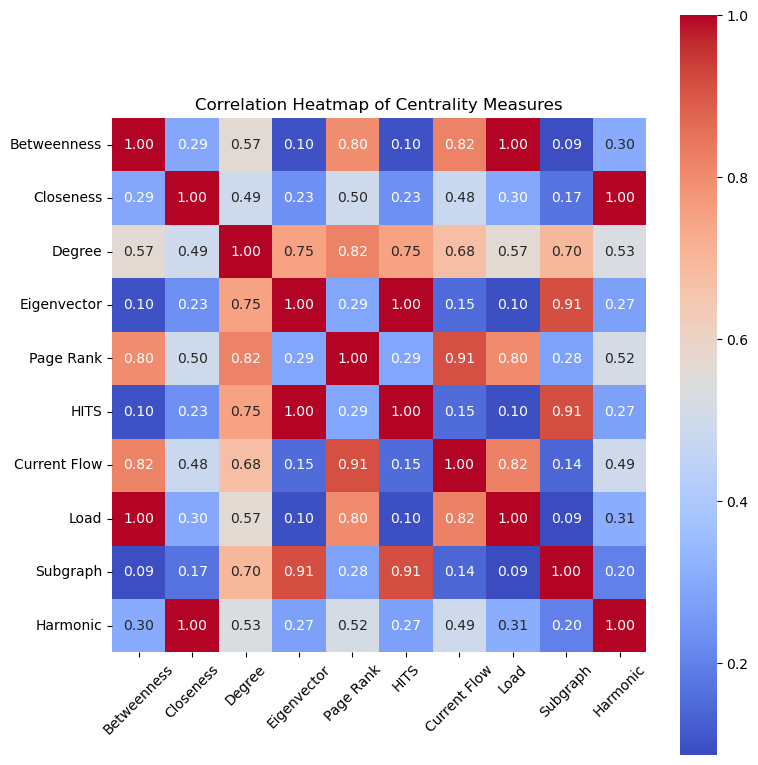

In [16]:
# Convert centrality measures to DataFrames
centrality_measures = {
    'Betweenness': betweenness_centrality,
    'Closeness': closeness_centrality,
    'Degree': degree_centrality,
    'Eigenvector': eigenvector_centrality,
    'Page Rank': page_rank_centrality,
    'HITS': hits_centrality,
    'Current Flow': current_flow_betweenness_centrality,
    'Load': load_centrality,
    'Subgraph': subgraph_centrality,
    'Harmonic': harmonic_centrality
}

# Compute correlations between centrality measures
centrality_df = pd.DataFrame(centrality_measures)
centrality_corr = centrality_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 8))
plt.title('Correlation Heatmap of Centrality Measures')
sns.heatmap(centrality_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Community Detection

In [17]:
communities = {}
modularity_values = {}
coverage_values = {}
performance_values = {}

k = 4
max_size = 4

In [18]:
communities['Bipartitions'] = nx.community.kernighan_lin_bisection(G_nx)
print('No of communities: ', len(communities['Bipartitions']))

modularity_values['Bipartitions'] = nx.community.modularity(G_nx, communities['Bipartitions'])

partition_quality = nx.community.partition_quality(G_nx, communities['Bipartitions'])
coverage_values['Bipartitions'] = partition_quality[0]
performance_values['Bipartitions'] = partition_quality[1]

No of communities:  2


In [19]:
communities['Modularity-based communities'] = nx.community.greedy_modularity_communities(G_nx)
print('No of communities: ', len(communities['Modularity-based communities']))

modularity_values['Modularity-based communities'] = nx.community.modularity(G_nx, communities['Modularity-based communities'])

partition_quality = nx.community.partition_quality(G_nx, communities['Modularity-based communities'])
coverage_values['Modularity-based communities'] = partition_quality[0]
performance_values['Modularity-based communities'] = partition_quality[1]

No of communities:  176


In [20]:
communities['Label propagation'] = nx.community.label_propagation_communities(G_nx)
print('No of communities: ', len(communities['Label propagation']))

modularity_values['Label propagation'] = nx.community.modularity(G_nx, communities['Label propagation'])

partition_quality = nx.community.partition_quality(G_nx, communities['Label propagation'])
coverage_values['Label propagation'] = partition_quality[0]
performance_values['Label propagation'] = partition_quality[1]

No of communities:  645


In [21]:
communities['Louvain Community Detection'] = nx.community.louvain_communities(G_nx)
print('No of communities: ', len(communities['Louvain Community Detection']))

modularity_values['Louvain Community Detection'] = nx.community.modularity(G_nx, communities['Louvain Community Detection'])

partition_quality = nx.community.partition_quality(G_nx, communities['Louvain Community Detection'])
coverage_values['Louvain Community Detection'] = partition_quality[0]
performance_values['Louvain Community Detection'] = partition_quality[1]

No of communities:  35


In [22]:
communities['Fluid Communities'] = list(nx.community.asyn_fluidc(G_nx, k))
print('No of communities: ', len(communities['Fluid Communities']))

modularity_values['Fluid Communities'] = nx.community.modularity(G_nx, communities['Fluid Communities'])

partition_quality = nx.community.partition_quality(G_nx, communities['Fluid Communities'])
coverage_values['Fluid Communities'] = partition_quality[0]
performance_values['Fluid Communities'] = partition_quality[1]

No of communities:  4


## Output

In [23]:
print("Output:\n")
print('Graph density:', nx.density(G_nx))
print('Clustering coefficient:', nx.average_clustering(G_nx))
print('Assortativity coefficient:', nx.degree_assortativity_coefficient(G_nx))

print("\nCorrelation between centrality measures:")
print(centrality_corr)

print("\n")
print("Modularity of Community Detection Algorithms")
print(modularity_values)
print("Coverage of Community Detection Algorithms")
print(coverage_values)
print("Performance of Community Detection Algorithms")
print(performance_values)

Output:

Graph density: 0.001003666431729103
Clustering coefficient: 0.17934725117824554
Assortativity coefficient: 0.20216154829063093

Correlation between centrality measures:
              Betweenness  Closeness    Degree  Eigenvector  Page Rank  \
Betweenness      1.000000   0.291845  0.566689     0.101109   0.799319   
Closeness        0.291845   1.000000  0.494264     0.233868   0.495043   
Degree           0.566689   0.494264  1.000000     0.753783   0.820584   
Eigenvector      0.101109   0.233868  0.753783     1.000000   0.289973   
Page Rank        0.799319   0.495043  0.820584     0.289973   1.000000   
HITS             0.101039   0.233815  0.753708     1.000000   0.289886   
Current Flow     0.819771   0.480504  0.678415     0.153068   0.913311   
Load             0.998905   0.297005  0.565307     0.096391   0.802974   
Subgraph         0.091567   0.169109  0.698745     0.914666   0.276903   
Harmonic         0.303543   0.998479  0.530785     0.272546   0.516064   

       

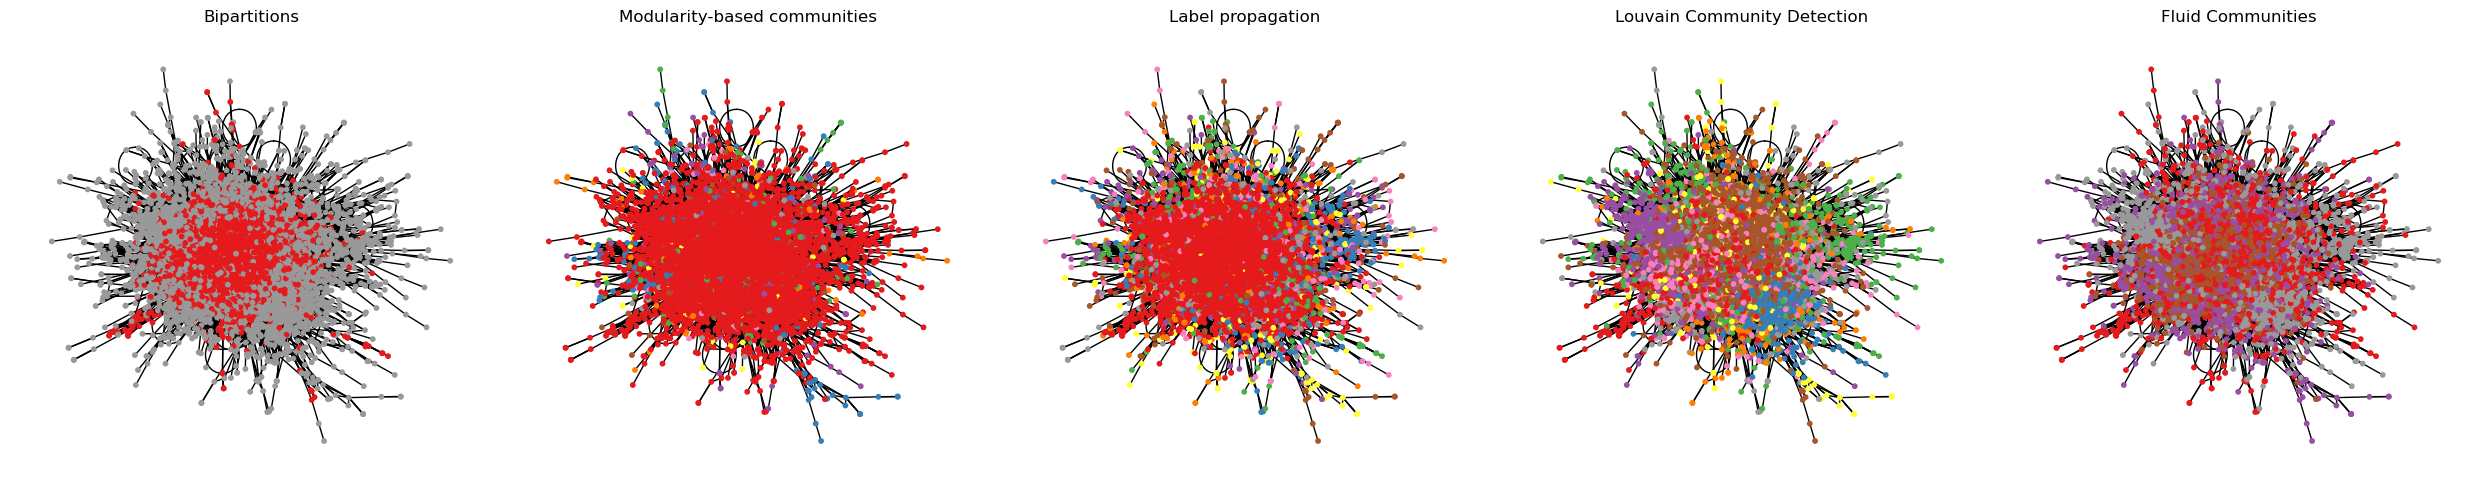

In [24]:
pos = nx.spring_layout(G_nx)
num_algorithms = len(communities)
    
fig, axes = plt.subplots(1, num_algorithms, figsize=(num_algorithms * 5, 5))

for idx, (algorithm, communities) in enumerate(communities.items()):
    ax = axes[idx] if num_algorithms > 1 else axes
    ax.set_title(algorithm)
        
    node_colors = []
    for node in G_nx.nodes:
        for community_idx, community in enumerate(communities, start=1):
            if node in community:
                node_colors.append(community_idx)
                break  # Break once the node is found in a community
        
    nx.draw(G_nx, pos, ax=ax, with_labels=False, node_size=10, node_color=node_colors, cmap=plt.cm.Set1)
    
plt.tight_layout()
plt.show()

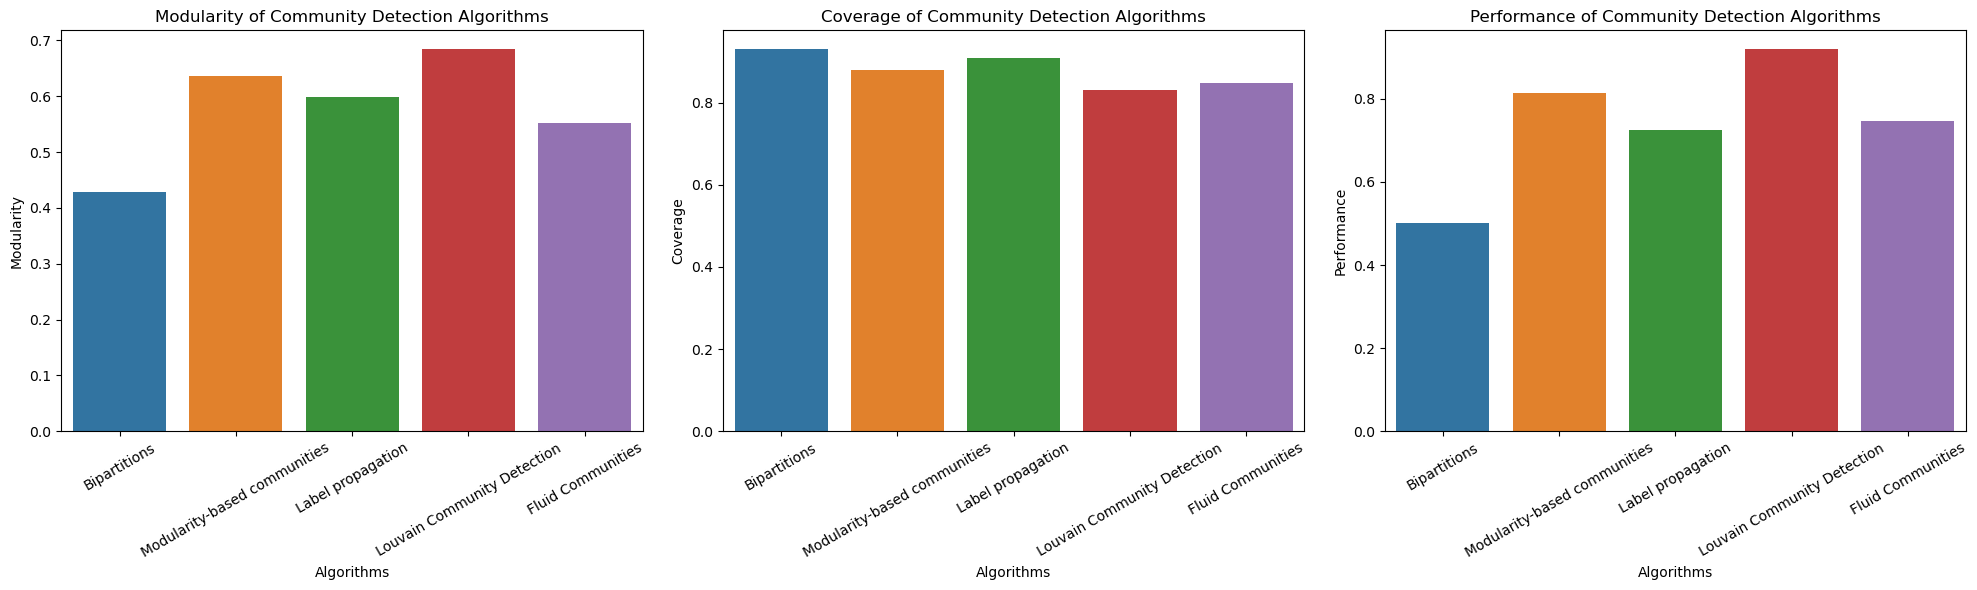

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plotting modularity values
sns.barplot(x=list(modularity_values.keys()), y=list(modularity_values.values()), ax=axes[0])
axes[0].set_title('Modularity of Community Detection Algorithms')
axes[0].set_xlabel('Algorithms')
axes[0].set_ylabel('Modularity')
axes[0].tick_params(axis='x', rotation=30)

# Plotting coverage values
sns.barplot(x=list(coverage_values.keys()), y=list(coverage_values.values()), ax=axes[1])
axes[1].set_title('Coverage of Community Detection Algorithms')
axes[1].set_xlabel('Algorithms')
axes[1].set_ylabel('Coverage')
axes[1].tick_params(axis='x', rotation=30)

# Plotting performance values
sns.barplot(x=list(performance_values.keys()), y=list(performance_values.values()), ax=axes[2])
axes[2].set_title('Performance of Community Detection Algorithms')
axes[2].set_xlabel('Algorithms')
axes[2].set_ylabel('Performance')
axes[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()